In [59]:
#Import functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import prophet as Prophet
import statsmodels as sm
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np
import ruptures as rpt
from sklearn.cluster import DBSCAN

In [60]:
# Data Loading
air_data = pd.read_csv('AirQualityUCI.csv', sep=";")
car_sales = pd.read_csv('Car_Sales_Data_1.csv')
tfcu_data = pd.read_excel("TCFU Member Retention KPI Tree data.xlsx",
                          sheet_name= 'KPI Data')
mgl_data = pd.read_excel('5yr_sales.xlsx')
ice_data = pd.read_csv('ice_cream_vs_heater.csv')

In [61]:
preprocessed_tfcu_df = tfcu_data.groupby('Week').mean(['Member Retention', 'Employee Retention',
       'Member Satisfaction NPS', 'Fraud rate', 'Employee satisfaction',
       'Number of Employee Relations Issues', '# of Member complaints',
       'Member acquisition cost (CAC)', 'Number of Compliance Issues',
       'Compliance Investigation Cycle Time', 'Decline rate',
       'Financial impact due to attacks',
       'Attempted vs Fraudulent Transactions', 'Final Approval rate',
       'Fraudulent Vs Declined Transactions', 'System Uptime',
       'Severity of attacks', 'Mean Time Between Failures (MTBF)',
       'Cost per incident', 'Number of cybersecurity incidents reported']).reset_index()

## Trend analysis


In [62]:
car_sales.columns

Index(['Date', 'Compact_SUV', 'SUV', 'Sedan', 'Compact_SUV_TamilNadu',
       'Compact_SUV_AndraPradesh', 'Compact_SUV_TamilNadu_Dealer1',
       'Suv_TamilNadu_Dealer1', 'Sedan_TamilNadu_Dealer1',
       'Compact_SUV_TamilNadu_Dealer2', 'Suv_TamilNadu_Dealer2',
       'Sedan_TamilNadu_Dealer2', 'Compact_SUV_TamilNadu_Dealer3',
       'Suv_TamilNadu_Dealer3', 'Sedan_TamilNadu_Dealer3',
       'Compact_SUV_AndraPradesh_Dealer1', 'Suv_AndraPradesh_Dealer1',
       'Sedan_AndraPradesh_Dealer1', 'Compact_SUV_AndraPradesh_Dealer2',
       'Suv_AndraPradesh_Dealer2', 'Sedan_AndraPradesh_Dealer2',
       'Compact_SUV_AndraPradesh_Dealer3', 'Suv_AndraPradesh_Dealer3',
       'Sedan_AndraPradesh_Dealer3', 'Horse_Power', 'Fuel_Type', 'Promotions',
       'Resale_Value', 'Competitors', 'Holiday', 'Temperature', 'Petrol_Price',
       'diesel_price', 'electric_price_per_unit', 'Import_Charges',
       'Export_Charges', 'Inflation_Rate', 'Car_Interest_Rates', 'Event_Flag',
       'Event_Intensity',

In [63]:
preprocessed_tfcu_df.columns

Index(['Week', 'Unnamed: 10', 'Member Retention', 'Employee Retention',
       'Member Satisfaction NPS', 'Fraud rate', 'Employee satisfaction',
       'Number of Employee Relations Issues', '# of Member complaints',
       'Member acquisition cost (CAC)', 'Number of Compliance Issues',
       'Compliance Investigation Cycle Time', 'Decline rate',
       'Financial impact due to attacks',
       'Attempted vs Fraudulent Transactions', 'Final Approval rate',
       'Fraudulent Vs Declined Transactions', 'System Uptime',
       'Severity of attacks', 'Mean Time Between Failures (MTBF)',
       'Cost per incident', 'Number of cybersecurity incidents reported'],
      dtype='object')

In [64]:
mgl_data.columns


Index(['Date', 'w_sales', 'w_GCV', 'w_NCV', 'm_sales', 'm_GCV', 'm_NCV',
       't_sales', 't_GCV', 't_NCV', 'a_sales', 'a_GCV', 'a_NCV', 'ip4_sales',
       'ip4_GCV', 'ip4_NCV', 'Meter Reading (SCM)', 'GCV', 'NCV',
       'Total (SCM)', 'GCV.1', 'NCV.1'],
      dtype='object')

In [65]:
air_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [66]:
data_test = car_sales['Sedan_AndraPradesh_Dealer2'].values
data_test

array([101,  77,  85, 123, 138,  99, 107, 133, 114, 132, 128, 110, 147,
       162, 139, 158, 120, 118, 150, 110, 133, 110, 125, 139, 152, 128,
       138, 124,  94, 134, 133, 100,  97,  90, 103,  94, 100,  67,  64,
        63,  61,  67, 107, 104,  52,  73,  77,  74,  58,  42,  79,  94,
        55,  81,  90,  73,  58,  77,  98,  78, 104,  77,  78,  81,  81,
       118, 110,  88,  98, 128,  90, 138,  97,  99, 111, 117, 149, 127,
       137, 138, 163, 145, 122, 129, 164, 147, 123, 146, 146, 161, 155,
       142, 153, 118, 118, 140, 117, 117, 104, 110, 107,  99,  96, 124,
       129, 124,  87,  78,  74, 103,  98,  68,  58,  97,  97,  88,  94,
        46,  55,  63,  62,  54,  89,  89,  92,  73, 103,  85,  58, 106,
        64,  93,  82,  90, 117, 124,  97, 111, 107, 124, 113, 101, 121,
       136, 118, 106, 138, 140, 118, 116, 123, 125, 128, 120, 146, 140,
       162, 125, 167, 133, 119, 125, 148, 127, 117, 145, 147, 147, 109,
       130, 123, 136, 113,  94, 108,  90, 120, 113,  77, 103,  7

In [67]:
def linear_reg(data_array):
    lin_reg_model = LinearRegression()

    X = np.arange(len(data_array)).reshape(-1, 1)
    y = data_array

    lr_result = lin_reg_model.fit(X=X.reshape(-1, 1), y= y)

    return (X, y, lr_result)

def analyse(slope):
    #Hard coded the condition for consolidating
    if -0.05 < slope < 0.05:
        return 'consolidating'
    elif slope > 0:
        return 'increasing'
    else:
        return 'decreasing'
    
def lr_plot(X, y, lr_result):
    # Scatter plot of the data
    plt.scatter(X, y, label='Data Points')

    # Plot the linear regression line
    plt.plot(X, lr_result.predict(X), color='red', label='Linear Regression')

    # Add labels and a legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()
    print('Slope:', lr_result.coef_[0])
    print('Trend:', analyse(lr_result.coef_))
    print('average_percentage_change', lr_result.coef_[0]/np.mean(y)*100)


In [68]:
def smoothing_lowess(data):
    frac = 0.2
    smoothed_data_lowess = lowess(data, np.arange(len(data)), frac=frac, return_sorted=False)
    return smoothed_data_lowess

def change_point_detection(data_array):
    cpd_pelt = rpt.Pelt(model='rbf').fit(data_array)
    cpd_result = cpd_pelt.predict(pen= 2*np.log(len(data_array)))

    # if data_array[-1] not in cpd_result:
    #     np.append(cpd_result, data_array[-1])
    return cpd_result

def piece_wise_linear_reg(X,y, result):

    if len(y)-1 not in result:
        np.append(result, len(y)-1)
    if 0 not in result:
        result = [0] + result

    # Add colored backgrounds for each segment
    color_list = []
    lr_models = {}
    for i in range(len(result) - 1):
        segment_X = X[result[i]:result[i + 1]]
        segment_y = y[result[i]:result[i + 1]]

        # Fit linear regression model
        lin_reg_model = LinearRegression()
        lin_reg_model.fit(segment_X, segment_y)
        lr_models[f'section{i}'] = lin_reg_model
        # Get slope to determine the trend
        slope = lin_reg_model.coef_

        # Set background color based on the trend
        color = "blue" if -0.1 < slope < 0.1 else "green" if slope > 0 else "red" if slope < 0 else None
        color_list.append(color)

    return color_list, result, lr_models


def pwlr_plot(X, y, result, lr_models):
    # Plot the data with change points and colored backgrounds
    plt.figure(figsize=(10, 5))

    # Plot the data points
    plt.plot(y.reshape(-1), label="Data Points")
    if 0 not in result:
        result = [0] + result

    # Add colored backgrounds for each segment
    for i in range(len(result) - 1):
        segment_X = X[result[i]:result[i + 1]]
        segment_y = y[result[i]:result[i + 1]]

        # Get slope to determine the trend
        slope = lr_models[f'section{i}'].coef_
        color_list = []
        # Set background color based on the trend
        color = "blue" if -0.1 < slope < 0.1 else "green" if slope > 0 else "red" if slope < 0 else None
        color_list.append(color)
        plt.axvspan(segment_X.min(), segment_X.max(), facecolor=color, alpha=0.2, label=f"Segment {i + 1}")

        start_idx = result[i]
        end_idx = result[i + 1]   # Add 1 to include the endpoint
        percentage_change = ((y[end_idx-1] - y[start_idx])/y[start_idx])* 100
        # Print trend information
        print(f"Section {i+1}:")
        print(f"  Start Index: {start_idx}")
        print(f"  End Index: {end_idx-1}")
        print(f"  First Point: {y[start_idx]}")
        print(f"  Last Point: {y[end_idx-1]}")
        print(f"  Slope (Trend): {slope}")
        print(f"  Percentage Change (Trend): {percentage_change}")
        print(f"  Trend: {analyse(slope)}")
        print("---------------------------")

    # Highlight the change points
    for point in result[:-1]:
        plt.axvline(x=X[point], linestyle="--", color="black", label="Change Point")

    plt.legend(labels = [])
    plt.show()



def merge_consecutive_trends(indices, trends):
    merged_indices = [indices[0]]
    merged_trends = [trends[0]]
    for i in range(1, len(trends)):
        if trends[i] != trends[i - 1]:
            merged_indices.append(indices[i])
            merged_trends.append(trends[i])
            
    if indices[-1] not in merged_indices:
        merged_indices.append(indices[-1])

    return merged_indices, merged_trends
        

In [69]:
def trend_analysis(data_array, time_series = None):
    
    smoothed_data_lowess = smoothing_lowess(data_array)
    cpd_result = change_point_detection(smoothed_data_lowess)
    data_X, data_y, lr_result = linear_reg(data_array)
    first_last_index_list = {0, len(data_array)}
    real_cp = [point for point in cpd_result if point not in first_last_index_list]
    print('CDP_list:' ,cpd_result)
    if real_cp == []:
        lr_plot(data_X, data_y, lr_result)
    else:     
        color_list, result_cpd, _ = piece_wise_linear_reg(data_X, data_y, cpd_result)
        for _ in range(3):
            result_cpd, color_list = merge_consecutive_trends(indices= result_cpd, trends= color_list)
            color_list, result_cpd, _ = piece_wise_linear_reg(data_X, data_y, result_cpd)
        color_list, result_cpd, lr_models = piece_wise_linear_reg(data_X, data_y, result_cpd)
        pwlr_plot(data_X, data_y, result_cpd, lr_models)        

--------------------------------------------------------
Week
--------------------------------------------------------
Unnamed: 10
--------------------------------------------------------
Member Retention
CDP_list: [52]


C:\Users\1004153\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\1004153\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


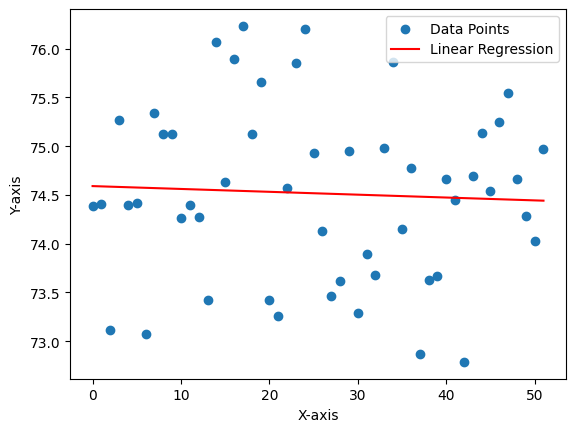

Slope: -0.0029308247246649234
Trend: consolidating
average_percentage_change -0.003933173084922955
--------------------------------------------------------
Employee Retention
CDP_list: [52]


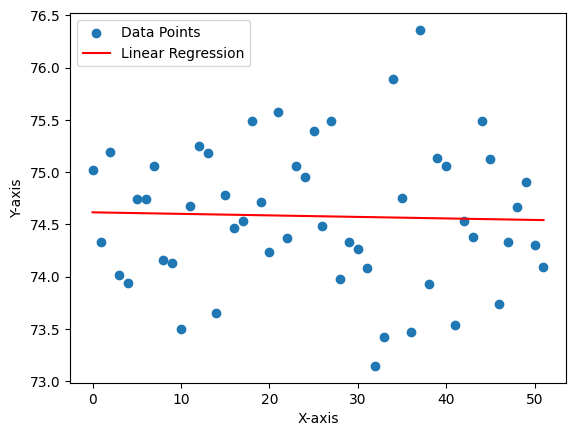

Slope: -0.0014556475710749226
Trend: consolidating
average_percentage_change -0.0019518614164657521
--------------------------------------------------------
Member Satisfaction NPS
CDP_list: [52]


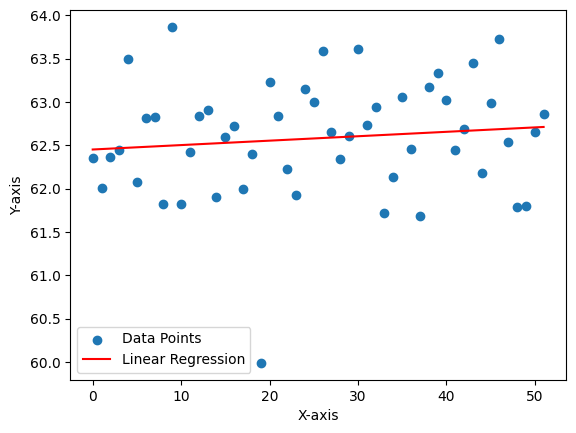

Slope: 0.005100315888329225
Trend: consolidating
average_percentage_change 0.00814968514704691
--------------------------------------------------------
Fraud rate
CDP_list: [52]


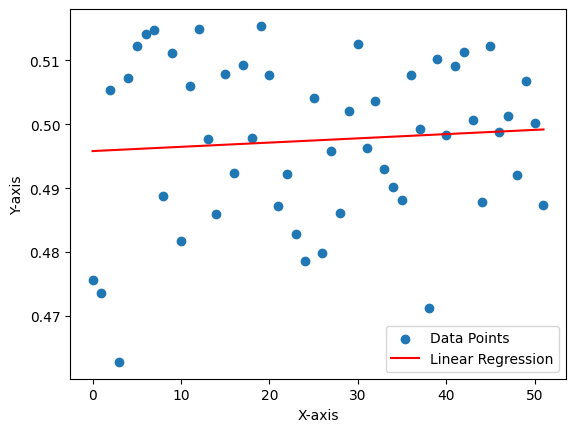

Slope: 6.641856530277192e-05
Trend: consolidating
average_percentage_change 0.013350358803849043
--------------------------------------------------------
Employee satisfaction
CDP_list: [52]


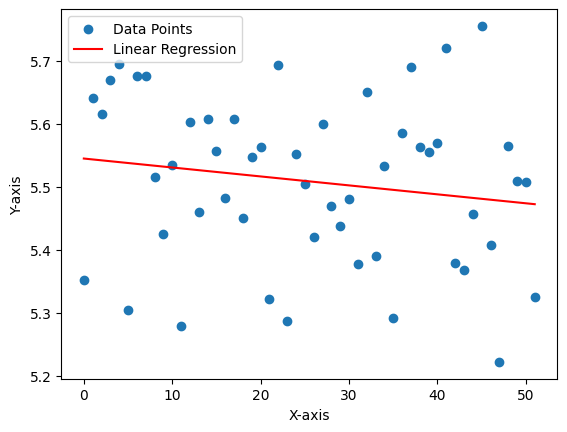

Slope: -0.0014185093485870382
Trend: consolidating
average_percentage_change -0.02575056244598568
--------------------------------------------------------
Number of Employee Relations Issues
CDP_list: [52]


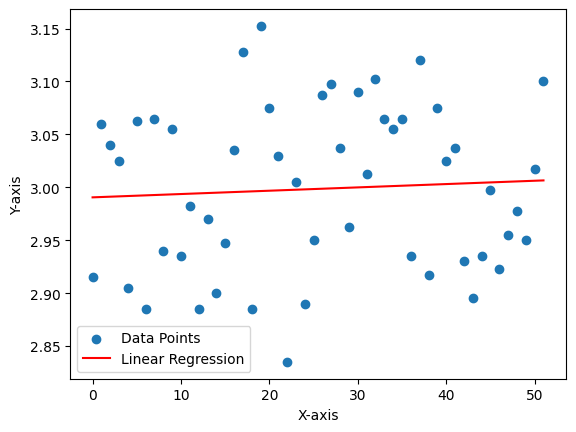

Slope: 0.0003138606676342551
Trend: consolidating
average_percentage_change 0.010467222316844117
--------------------------------------------------------
# of Member complaints
CDP_list: [25, 52]
Section 1:
  Start Index: 0
  End Index: 51
  First Point: 10.5675
  Last Point: 9.965
  Slope (Trend): [-0.00351127]
  Percentage Change (Trend): -5.701443103856171
  Trend: consolidating
---------------------------


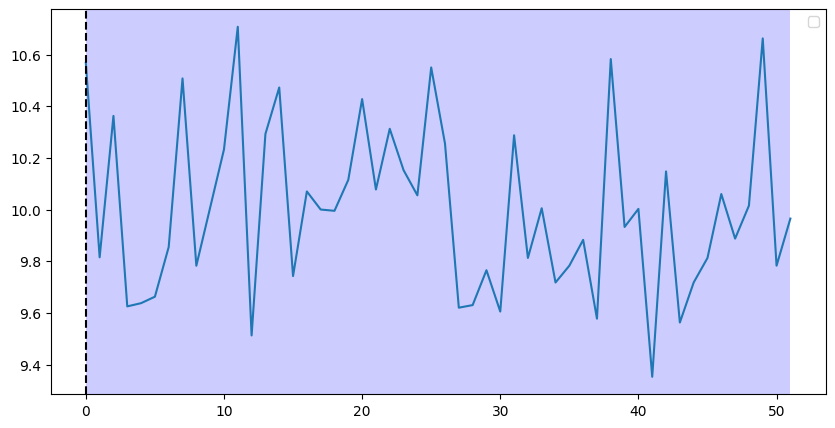

--------------------------------------------------------
Member acquisition cost (CAC)
CDP_list: [52]


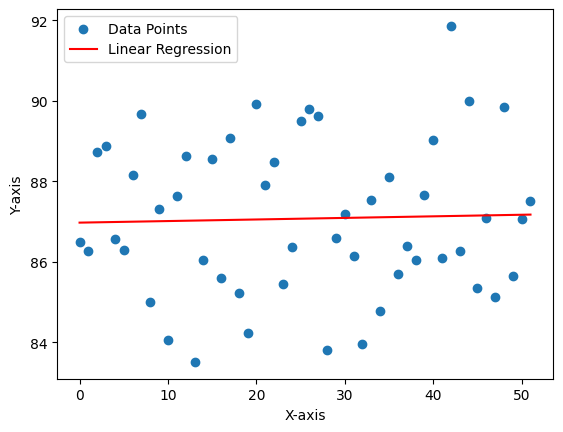

Slope: 0.003912959959019905
Trend: consolidating
average_percentage_change 0.00449394990136415
--------------------------------------------------------
Number of Compliance Issues
CDP_list: [30, 52]
Section 1:
  Start Index: 0
  End Index: 51
  First Point: 2.49
  Last Point: 2.5675
  Slope (Trend): [0.00108832]
  Percentage Change (Trend): 3.1124497991967743
  Trend: consolidating
---------------------------


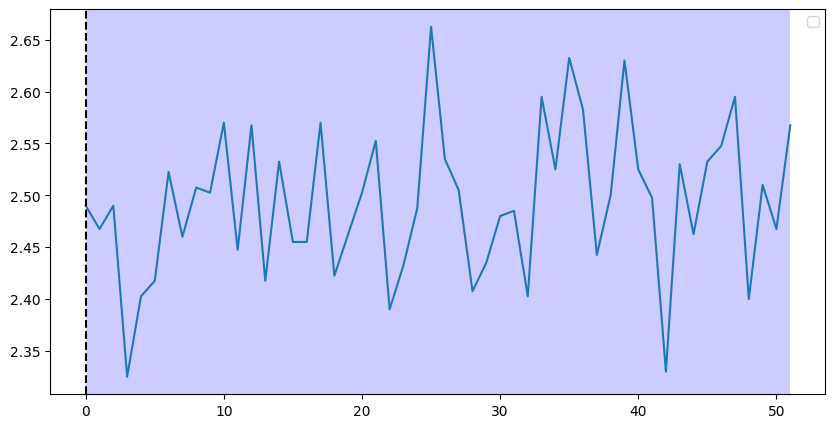

--------------------------------------------------------
Compliance Investigation Cycle Time
CDP_list: [52]


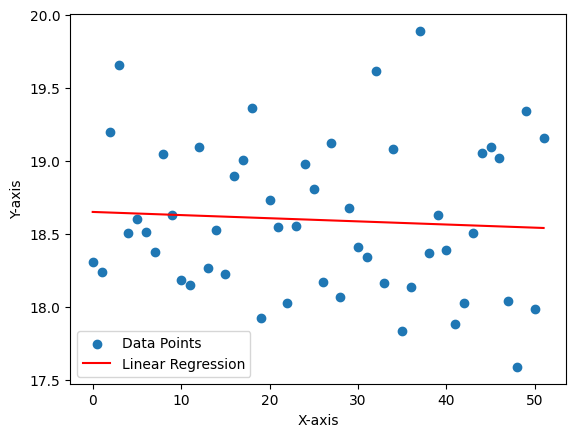

Slope: -0.002153269871083413
Trend: consolidating
average_percentage_change -0.011579203902443656
--------------------------------------------------------
Decline rate
CDP_list: [35, 52]
Section 1:
  Start Index: 0
  End Index: 51
  First Point: 7.745
  Last Point: 7.75
  Slope (Trend): [-0.00342301]
  Percentage Change (Trend): 0.06455777921239371
  Trend: consolidating
---------------------------


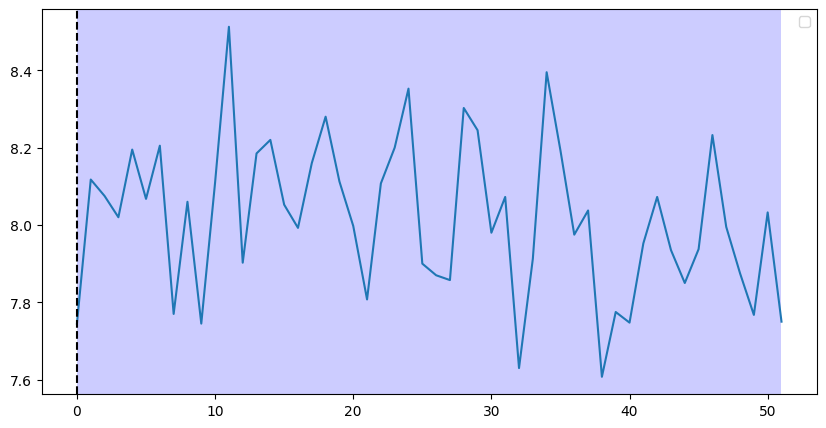

--------------------------------------------------------
Financial impact due to attacks
CDP_list: [20, 52]
Section 1:
  Start Index: 0
  End Index: 51
  First Point: 14709.1
  Last Point: 15103.4275
  Slope (Trend): [1.51015816]
  Percentage Change (Trend): 2.6808404321134494
  Trend: increasing
---------------------------


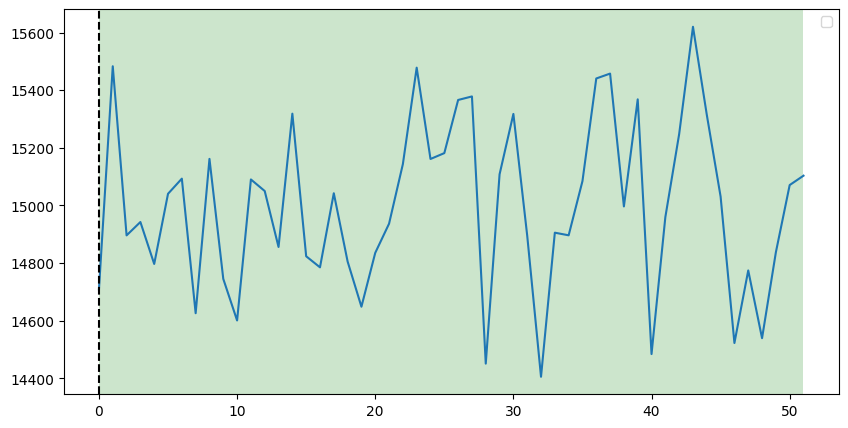

--------------------------------------------------------
Attempted vs Fraudulent Transactions
CDP_list: [52]


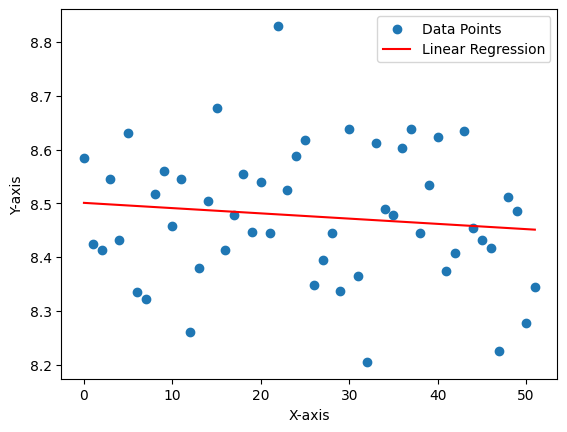

Slope: -0.0009771194399385355
Trend: consolidating
average_percentage_change -0.011528124986228894
--------------------------------------------------------
Final Approval rate
CDP_list: [52]


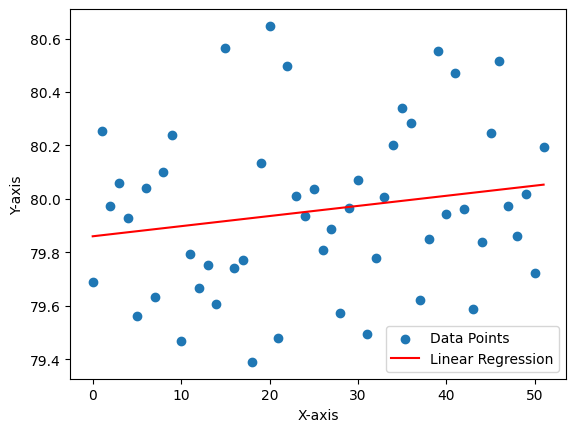

Slope: 0.0037900196363015387
Trend: consolidating
average_percentage_change 0.004740082594757988
--------------------------------------------------------
Fraudulent Vs Declined Transactions
CDP_list: [52]


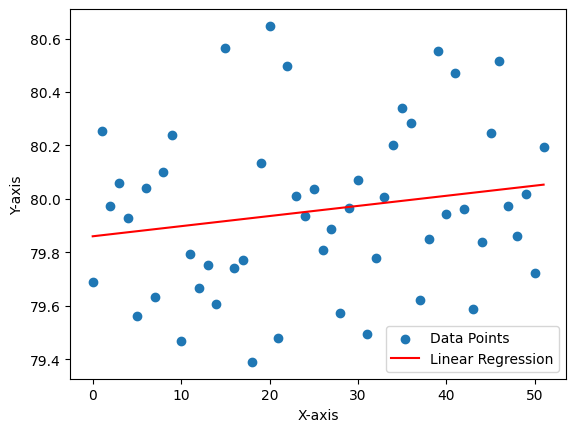

Slope: 0.0037900196363015387
Trend: consolidating
average_percentage_change 0.004740082594757988
--------------------------------------------------------
System Uptime
CDP_list: [52]


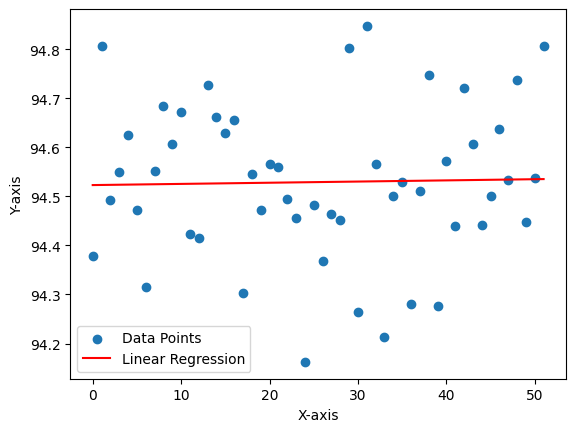

Slope: 0.0002394775036284637
Trend: consolidating
average_percentage_change 0.0002533372431714706
--------------------------------------------------------
Severity of attacks
CDP_list: [52]


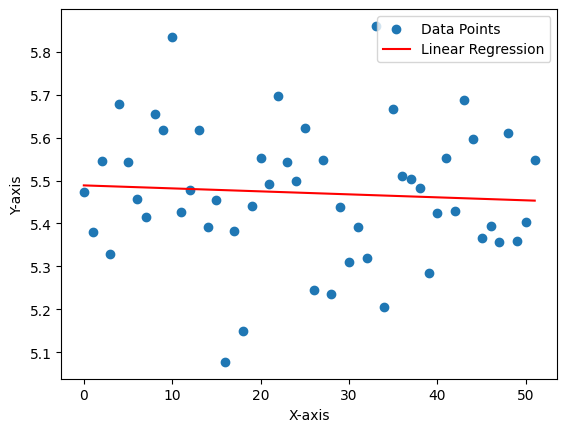

Slope: -0.0006962349526167492
Trend: consolidating
average_percentage_change -0.012726230745406948
--------------------------------------------------------
Mean Time Between Failures (MTBF)
CDP_list: [52]


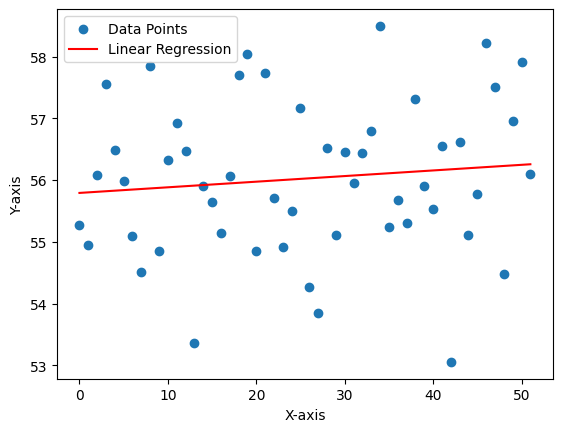

Slope: 0.009102066080423474
Trend: consolidating
average_percentage_change 0.016246575973158067
--------------------------------------------------------
Cost per incident
CDP_list: [30, 52]
Section 1:
  Start Index: 0
  End Index: 29
  First Point: 7535.725
  Last Point: 7474.9525
  Slope (Trend): [1.12234538]
  Percentage Change (Trend): -0.806458569016253
  Trend: increasing
---------------------------
Section 2:
  Start Index: 30
  End Index: 51
  First Point: 7683.5175
  Last Point: 7479.9525
  Slope (Trend): [-3.18409373]
  Percentage Change (Trend): -2.649372504194851
  Trend: decreasing
---------------------------


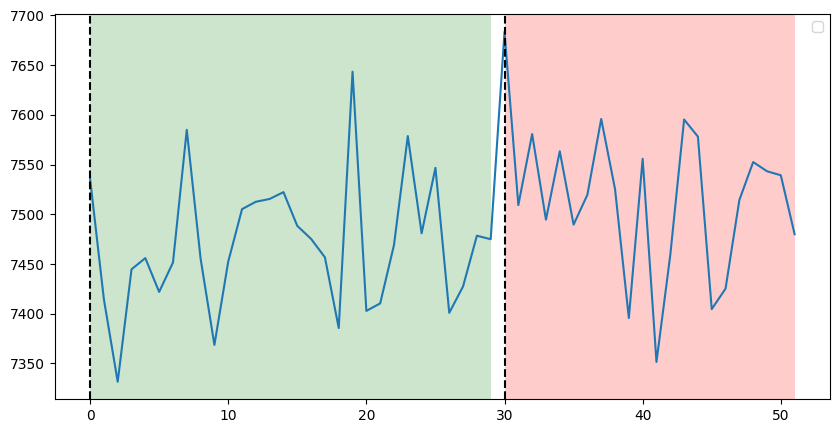

--------------------------------------------------------
Number of cybersecurity incidents reported
CDP_list: [52]


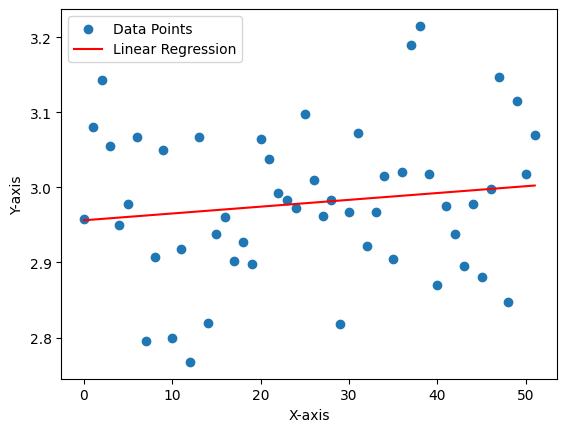

Slope: 0.0009082856654998714
Trend: consolidating
average_percentage_change 0.030486762481881785


In [81]:
for i in preprocessed_tfcu_df.columns:
        try:
                print('--------------------------------------------------------')
                print(i)
                trend_analysis(preprocessed_tfcu_df[i].values)
        except:
                pass



### Prophet Trend CPD analysis

In [113]:
data = car_sales[['Date', 'SUV']].loc[0:100]
data.columns = ['ds', 'y']
data['ds']  = pd.to_datetime(data['ds'], format= '%m/%d/%Y')

In [114]:
def fit_predict_model(dataframe, interval_width = 0.99, changepoint_range = 1):
    m = Prophet.Prophet(changepoint_range = changepoint_range, interval_width = interval_width)
    # m = Prophet.Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
    #             # seasonality_mode = 'multiplicative', 
    #             interval_width = interval_width,
    #             changepoint_range = changepoint_range)
    m = m.fit(dataframe)
    
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    print('Displaying Prophet plot')
    # fig1 = m.plot(forecast)
    return forecast, m
    
pred, m = fit_predict_model(data)

def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted

change_points = m.changepoints

pred = detect_anomalies(pred)
pred.head()


18:20:05 - cmdstanpy - INFO - Chain [1] start processing
18:20:05 - cmdstanpy - INFO - Chain [1] done processing


Displaying Prophet plot


,ds,trend,yhat,yhat_lower,yhat_upper,fact,anomaly,importance
0,2022-01-01,721.011732,727.656150,442.002980,1006.500465,685,0,0
1,2022-01-02,718.823518,721.318065,427.115438,1000.281887,717,0,0
2,2022-01-03,716.635303,725.366162,421.141847,1007.053373,696,0,0
3,2022-01-04,714.447089,718.633840,413.122870,1006.529412,706,0,0
4,2022-01-05,712.258875,694.804913,383.423751,1001.317086,597,0,0


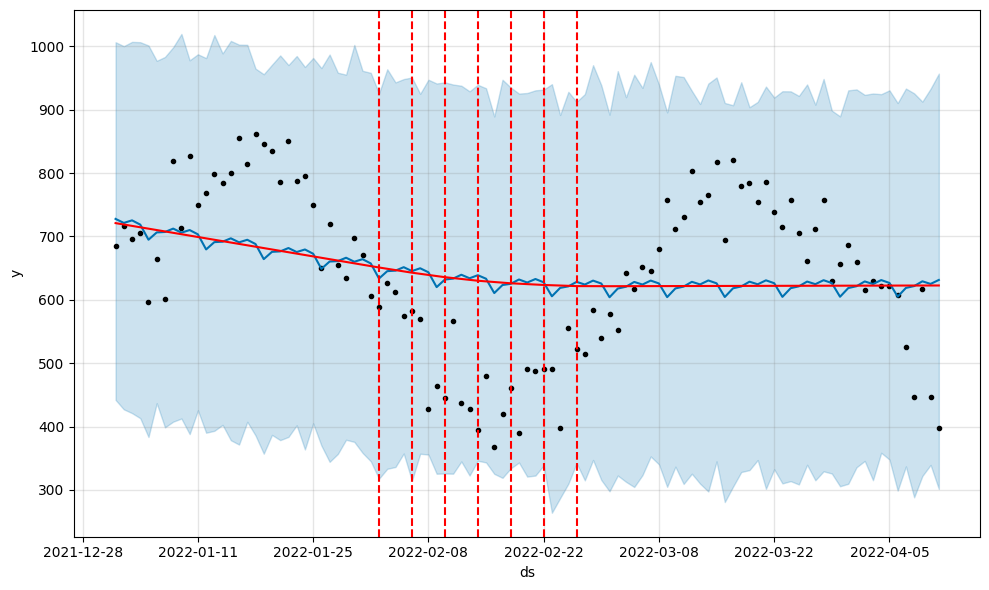

In [115]:

from prophet.plot import add_changepoints_to_plot
fig = m.plot(pred)
a = add_changepoints_to_plot(fig.gca(), m, pred)


In [116]:
def dbscan_1d(points):
    dbscan = DBSCAN( eps = 10, min_samples = 2)
    labels = dbscan.fit_predict(points)

    # Create lists for each cluster
    unique_labels = np.unique(labels)
    clusters = {label: points[labels == label].flatten() for label in unique_labels if label != -1}

    for label, cluster_points in clusters.items():
        clusters[label] =  int(cluster_points.mean())
    return list(clusters.values())


18:20:10 - cmdstanpy - INFO - Chain [1] start processing
18:20:10 - cmdstanpy - INFO - Chain [1] done processing


32   2022-02-02
36   2022-02-06
40   2022-02-10
44   2022-02-14
48   2022-02-18
52   2022-02-22
56   2022-02-26
Name: ds, dtype: datetime64[ns]
[44]
Section 1:
  Start Index: 0
  End Index: 43
  First Point: 685
  Last Point: 427
  Slope (Trend): [-6.21028894]
  Percentage Change (Trend): -37.66423357664234
  Trend: decreasing
---------------------------
Section 2:
  Start Index: 44
  End Index: 100
  First Point: 395
  Last Point: 397
  Slope (Trend): [3.02041742]
  Percentage Change (Trend): 0.5063291139240507
  Trend: increasing
---------------------------


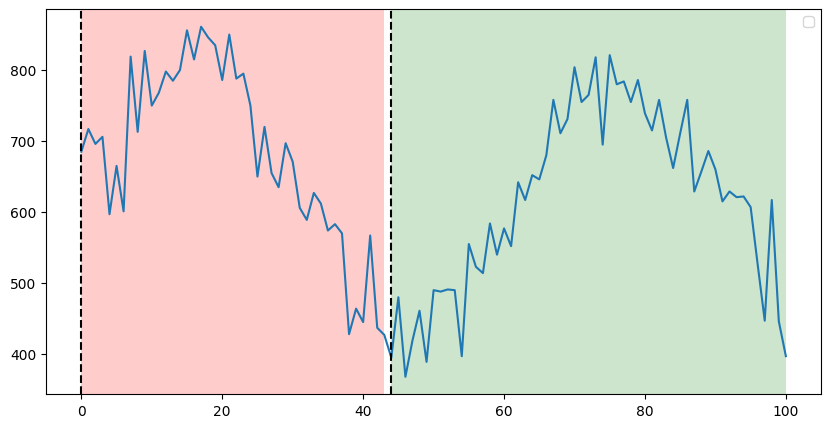

In [117]:
def prophet_trend_analysis(data_with_time_df,  interval_width = 0.99, changepoint_range = 1):
    prophet_model = Prophet.Prophet(changepoint_range = changepoint_range, interval_width = interval_width)
    prophet_model = prophet_model.fit(data_with_time_df)
    #dates of the change points
    signif_changepoints = prophet_model.changepoints[
                            np.abs(np.nanmean(prophet_model.params['delta'], axis=0)) >= 0.01
                                ] if len(prophet_model.changepoints) > 0 else []
    points = signif_changepoints.index.values.reshape(-1, 1)
    
    if len(points) > 4:
        change_points_index = dbscan_1d(points)
    else:
        change_points_index = list(points.reshape(-1))
  
    print(signif_changepoints)
    print(change_points_index)
    data_y = data_with_time_df['y'].values
    data_X = np.arange(len(data_y)).reshape(-1, 1)
    change_points_index.append(len(data_y))
    color_list, result_cpd, _ = piece_wise_linear_reg(data_X, data_y, change_points_index)
    # for _ in range(3):
    #     result_cpd, color_list = merge_consecutive_trends(indices= result_cpd, trends= color_list)
    #     color_list, result_cpd, _ = piece_wise_linear_reg(data_X, data_y, result_cpd)
    _, result_cpd, lr_models = piece_wise_linear_reg(data_X, data_y, result_cpd)
    pwlr_plot(data_X, data_y, result_cpd, lr_models)
    
    
prophet_trend_analysis(data)
    
    